<a href="https://colab.research.google.com/github/yuguerten/Casablanca-housing/blob/main/Casablanca_Housing_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("/content/housing_data.csv",encoding='latin-1')

In [11]:
housing.head()

,Location,Num_rooms,House_area(m²),Price(DH)
0,Oulfa Casablanca,3,116,980.0
1,Casablanca Marina Casablanca,2,142,530.0
2,Ain Diab Casablanca,3,280,450.0
3,Anfa Supérieur Casablanca,3,110,165.0
4,Les Hopitaux Casablanca,2,113,156.0


In [88]:
!python --version

Python 3.10.12


In [5]:
housing.shape

(594, 4)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        594 non-null    object 
 1   Num_rooms       594 non-null    int64  
 2   House_area(m²)  594 non-null    int64  
 3   Price(DH)       594 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.7+ KB


In [7]:
casablanca_housing = housing[['Num_rooms', 'House_area(m²)', 'Price(DH)']]

In [9]:
casablanca_housing.head()

,Num_rooms,House_area(m²),Price(DH)
0,3,116,980.0
1,2,142,530.0
2,3,280,450.0
3,3,110,165.0
4,2,113,156.0


array([[<Axes: title={'center': 'Num_rooms'}>,
        <Axes: title={'center': 'House_area(m²)'}>],
       [<Axes: title={'center': 'Price(DH)'}>, <Axes: >]], dtype=object)

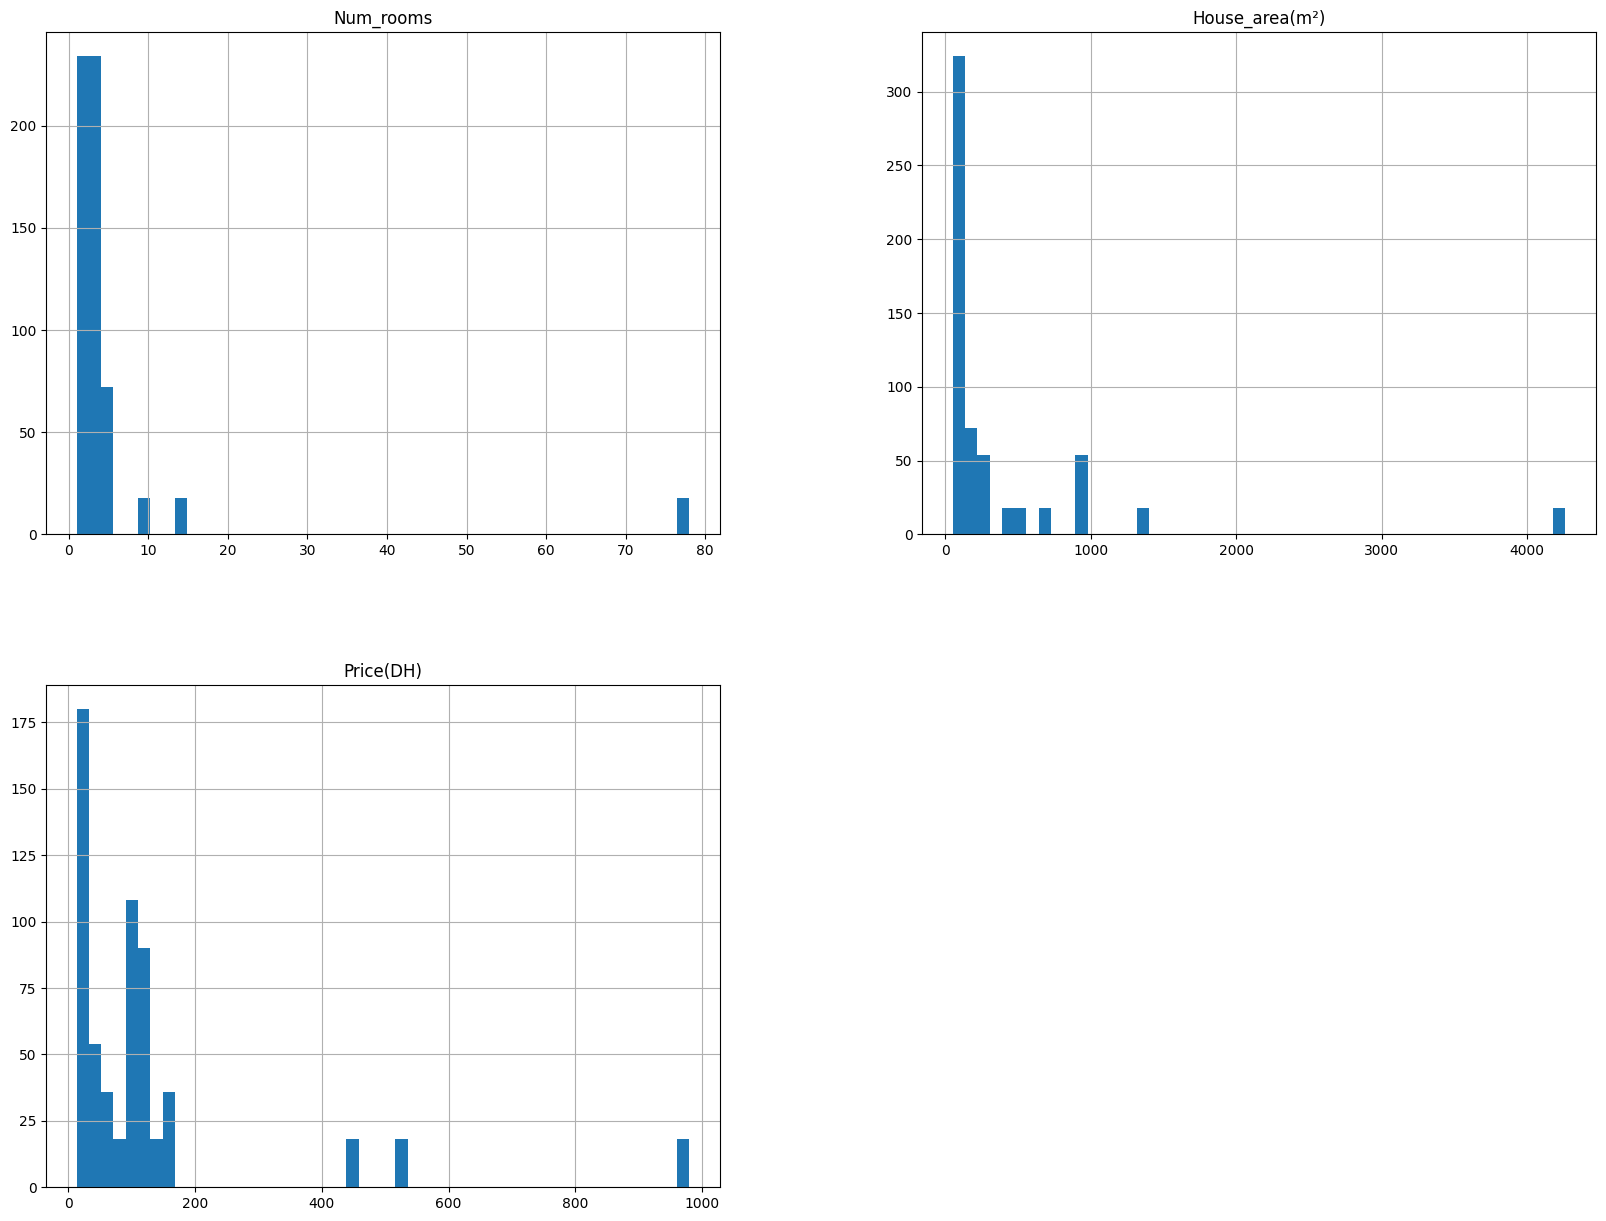

In [10]:
casablanca_housing.hist(bins=50,figsize=(20,15))

In [21]:
housing = casablanca_housing.drop_duplicates()
housing.shape

(32, 3)

In [23]:
housing_corr = housing.corr()
housing_corr

,Num_rooms,House_area(m²),Price(DH)
Num_rooms,1.000000,0.960844,-0.098681
House_area(m²),0.960844,1.000000,-0.162183
Price(DH),-0.098681,-0.162183,1.000000


In [34]:
housing_corr["Num_rooms"].sort_values(ascending=False)

Num_rooms         1.000000
House_area(m²)    0.960844
Price(DH)        -0.098681
Name: Num_rooms, dtype: float64

In [89]:
X=housing.drop(['Price(DH)'], axis='columns')
X.head()
y=housing['Price(DH)']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.33,
                                                    random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [102]:
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, y_train)))

 the intercept is 120.52446211997346
 the coeffiients are [ 4.1522605  -0.09332523]
 the R_sqaured value is 0.028377256761300096


In [103]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
print(performance)

    PREDICTIONS  ACTUAL VALUES       error
30    71.805845           15.0  -56.805845
16   118.797233           95.0  -23.797233
25    52.667052           20.0  -32.667052
18   121.829591           70.0  -51.829591
8    116.835979          116.0   -0.835979
9    112.263043          115.0    2.736957
31    97.656933           14.0  -83.656933
26    57.573036           16.0  -41.573036
13   124.395323          105.0  -19.395323
0    122.155517          980.0  857.844483
4    118.283232          156.0   37.716768


In [105]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
print(performance)

    level_0  index  PREDICTIONS  ACTUAL VALUES       error
0         0      0    71.805845           15.0  -56.805845
1         1      1   118.797233           95.0  -23.797233
2         2      2    52.667052           20.0  -32.667052
3         3      3   121.829591           70.0  -51.829591
4         4      4   116.835979          116.0   -0.835979
5         5      5   112.263043          115.0    2.736957
6         6      6    97.656933           14.0  -83.656933
7         7      7    57.573036           16.0  -41.573036
8         8      8   124.395323          105.0  -19.395323
9         9      9   122.155517          980.0  857.844483
10       10     10   118.283232          156.0   37.716768


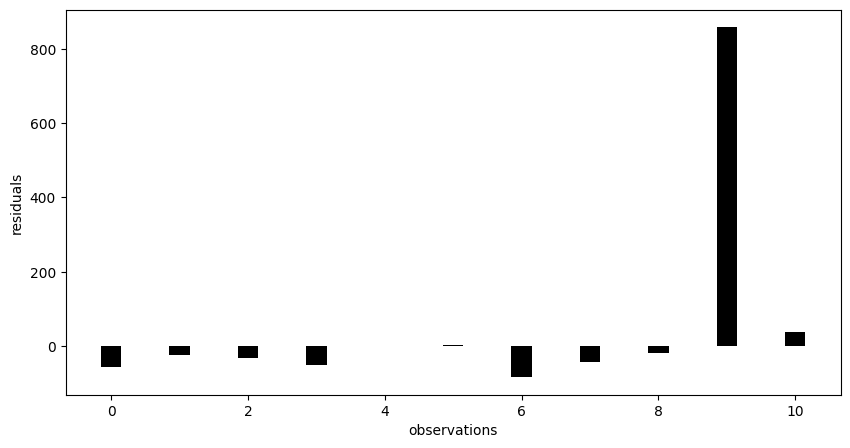

In [106]:
#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

In [107]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()

,const,Num_rooms,House_area(m²)
17,1.0,2,115
5,1.0,2,109
14,1.0,2,80
11,1.0,2,128
24,1.0,10,972


In [108]:
nicer_OLS=sm.OLS(y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price(DH)   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.2629
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.772
Time:                        19:17:10   Log-Likelihood:                -132.11
No. Observations:                  21   AIC:                             270.2
Df Residuals:                      18   BIC:                             273.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            120.5245     34.675      3.476      0.003      47.676     193.373
Num_rooms          4.1523      9.926      0.418      0.681     -16.701      25.005
House_area(m²)    -0.0933      0.178     -0.525      0.606      -0.467       0.280
==============================================================================
Omnibus:                       24.408   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.336
Skew:                           2.265   Prob(JB):                     5.77e-08
Kurtosis:                       7.192   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""